### Loading the Dataset

In [1]:
import pandas as pd 

drug_df = pd.read_csv('./Data/drug200.csv')
drug_df = drug_df.sample(frac=1)
drug_df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
27,49,F,NORMAL,NORMAL,9.381,drugX
122,34,M,NORMAL,HIGH,22.456,DrugY
159,34,F,LOW,NORMAL,12.923,drugX
181,59,F,NORMAL,HIGH,13.884,drugX
75,26,M,LOW,NORMAL,20.909,DrugY


#### Train Test Split

In [2]:
from sklearn.model_selection import train_test_split

X = drug_df.drop('Drug', axis=1).values
y = drug_df.Drug.values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

#### Machine Learning Pipelines

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# indexes of the columns
cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer(
    [
        ('encoder', OrdinalEncoder(), cat_col),
        ('num_imputer', SimpleImputer(strategy='median'), num_col),
        ('num_scaler', StandardScaler(), num_col),
    ]
)

pipe = Pipeline(
    steps=[
        ('preprocessing', transform),
        ('model', RandomForestClassifier(n_estimators=100, random_state=125),)
    ]
)


pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

#### Model Evaluation

In [5]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 100.0% F1: 1.0


In [6]:
# Creating the metrics file and save it in the results folder.

with open('./Results/metrics.txt', 'w') as outfile:
    outfile.write(f"\nAccuracy = {accuracy.round(2)}, F1 Score = {f1.round(2)}.")

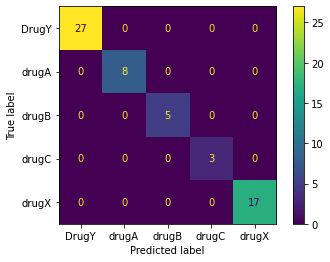

In [7]:
# creating the confusion matrix and save the image file in into the results folder.

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

#### Saving the Model

In [9]:
import skops.io as sio 

sio.dump(pipe, 'Model/drug_pipeline.skops')

In [11]:
# Loading the entire pipeline

sio.load('Model/drug_pipeline.skops', trusted=True)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

#### Conclusion:
- Copy and paste the entire code into the 'train.py' file. 
- This will be the standardized training script that will run in CI workflow whenever there is a change in the data or code.